# 93.复原IP地址
输入：只包含数字的字符串  
输出：返回由字符串中数字构成的所有合法的IP地址格式（每个IP地址需要用上所有数字进行划分）  

ps：有效的IP地址：
- 由四个整数构成，每个整数取值范围[0,255]
- 也就是每个整数最大三位数，但前导不能有0（033，023不合法）  
- 每个整数之间用 . 分隔

## 思路
本题和切割类似，就是用冒号把数字字符串进行分割  

分割问题用回溯搜索找到所有可能性  
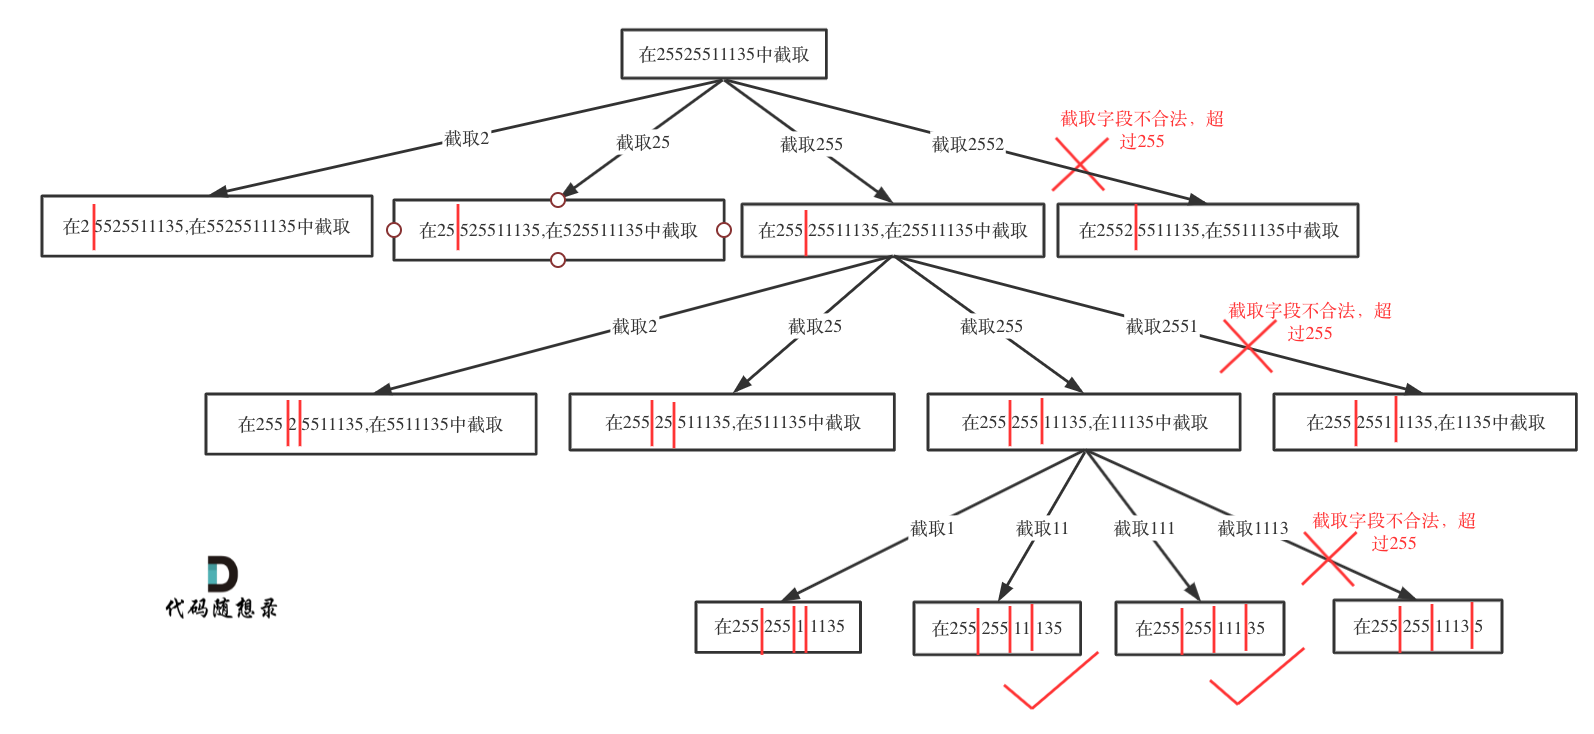  

## 回溯三部曲
1. 递归函数参数
   - 路径path和结果数组result  
   - 记录下一层分割的起始位置startindex
   - 一个IP地址需要三个冒号进行分割，记录冒号数量的pointNum

2. 终止条件
   - 题目给出的字符串可能可以分出不止一个IP地址，所以不能按照切割线到达字符串最后来终止  
   - 根据分割的段数作为终止条件，使用了三个冒号就已经切割了四段了  
   - pointNum == 3 时，判断IP地址是否合法，合法则保存结果并返回

3. 单层搜索逻辑
   - for循环横向遍历，递归函数纵向分割
   - 每次循环中截取的字串为[starIndex: i+1] 包含元素s[i],需要判断这个区间是否合法
   - 合法则在s[i]后面加上符号.表示IP地址中的一段
   - 不合法则结束本次for循环，
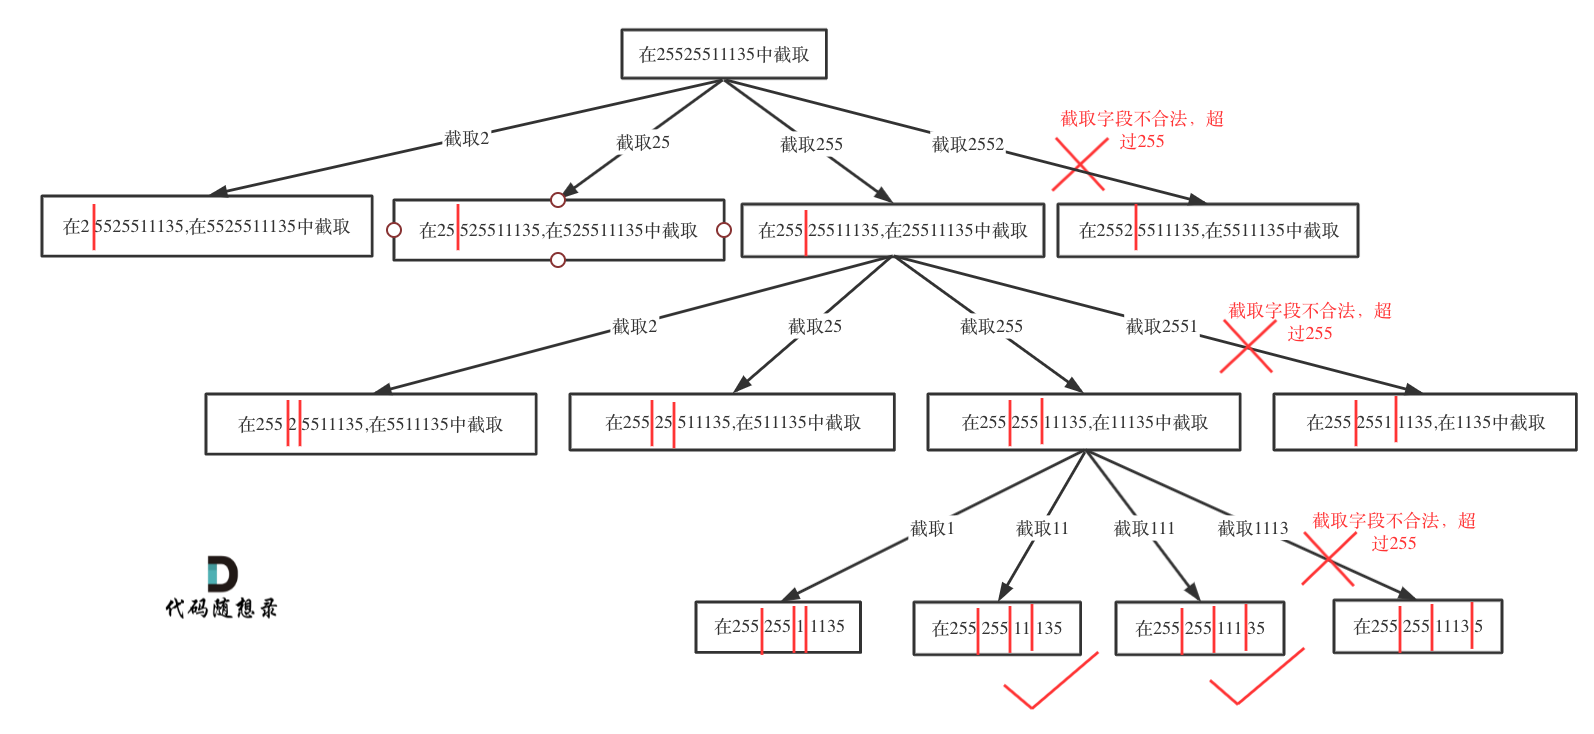  

ps：单层搜索中，下一层递归搜索要从 i+2 开始，因为在i后面i+1的位置插入了分隔符.

判断字串是否合法：
- 段位以0为开头的数字不合法
- 段位里有非正整数字符不合法
- 段位如果大于255了不合法


> 时间复杂度: O(3^4)，IP地址最多包含4个数字，每个数字最多有3种可能的分割方式，则搜索树的最大深度为4，每个节点最多有3个子节点。  
> 空间复杂度: O(n)
#总结

In [ ]:
# 回溯

class Solution:
    def restoreIPAddresses(self, s) -> list[str]:
        result = []
        self.backtracing(s, 0, 0, [], result)
        return result

    def backtracing(self, s, startIndex, pointNum, path, result):
        if pointNum == 3:      # 已经用了三个分隔符，分割结束
            if self.is_valid(s, startIndex, len(s) - 1):   # 判断最后一个字段是否合法
                path += s[startIndex:]   # 加入最后一个字段
                result.append(path)
            return
        
        for i in range(startIndex, len(s)):
            if self.is_valid(s, startIndex, i):   # 判断 [start_index, i] 这个区间的子串是否合法
                sub = s[startIndex, i+1]  # 取出当前字段
                self.backtracing(s, i+1, pointNum+1, path+sub+'.', result)  # 当前路径加上合法字段和分隔符（python字符串数组直接相加就是拼接）
            else:
                break   # 下一个for循环
    
    def is_valid(self, s, start, end):
        if start > end:
            return False
        if s[start] == '0' and start != end:   # 0开头的数字不合法 .082不行 但是.0.是可以的
            return False
        for i in range(start, end+1):
            if not s[i].isdigit():     # 非数字字符不合法
                return False
            num = int(s[start:end+1])   # 字符串数字转换为数字（按位）,切片左闭右开
            if num > 255:
                return False           # >255 不合法
        return True